# Fraud Detection - Data Exploration & Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Load Raw Data

In [2]:
df = pd.read_csv("../DATA/raw/financial_fraud_detection_dataset.csv")

In [3]:
df.head()

,transaction_id,timestamp,sender_account,receiver_account,amount,transaction_type,merchant_category,location,device_used,is_fraud,fraud_type,time_since_last_transaction,spending_deviation_score,velocity_score,geo_anomaly_score,payment_channel,ip_address,device_hash
0,T100000,2023-08-22T09:22:43.516168,ACC877572,ACC388389,343.78,withdrawal,utilities,Tokyo,mobile,False,NaN,NaN,-0.21,3,0.22,card,13.101.214.112,D8536477
1,T100001,2023-08-04T01:58:02.606711,ACC895667,ACC944962,419.65,withdrawal,online,Toronto,atm,False,NaN,NaN,-0.14,7,0.96,ACH,172.52.47.194,D2622631
2,T100002,2023-05-12T11:39:33.742963,ACC733052,ACC377370,2773.86,deposit,other,London,pos,False,NaN,NaN,-1.78,20,0.89,card,185.98.35.23,D4823498
3,T100003,2023-10-10T06:04:43.195112,ACC996865,ACC344098,1666.22,deposit,online,Sydney,pos,False,NaN,NaN,-0.60,6,0.37,wire_transfer,107.136.36.87,D9961380
4,T100004,2023-09-24T08:09:02.700162,ACC584714,ACC497887,24.43,transfer,utilities,Toronto,mobile,False,NaN,NaN,0.79,13,0.27,ACH,108.161.108.255,D7637601


In [4]:
df.tail()

,transaction_id,timestamp,sender_account,receiver_account,amount,transaction_type,merchant_category,location,device_used,is_fraud,fraud_type,time_since_last_transaction,spending_deviation_score,velocity_score,geo_anomaly_score,payment_channel,ip_address,device_hash
4999995,T5099995,2023-11-17T23:20:29.746144,ACC597319,ACC749300,10.87,withdrawal,retail,Toronto,atm,False,NaN,1416.524233,-0.14,17,0.18,UPI,243.92.38.163,D4439579
4999996,T5099996,2023-09-23T11:23:20.659686,ACC749625,ACC709783,181.40,payment,grocery,Sydney,atm,False,NaN,999.089702,-1.79,4,0.58,wire_transfer,28.252.18.249,D5029311
4999997,T5099997,2023-11-18T00:52:34.527092,ACC629492,ACC680736,12.54,payment,utilities,New York,mobile,False,NaN,3871.584025,-0.30,6,0.99,card,111.199.174.121,D6333607
4999998,T5099998,2023-03-25T04:32:13.609837,ACC984720,ACC296935,376.29,deposit,restaurant,Dubai,pos,False,NaN,-4096.765453,-1.43,5,0.32,wire_transfer,221.110.215.14,D1551203
4999999,T5099999,2023-09-02T04:34:34.583803,ACC120255,ACC440137,7.27,transfer,grocery,Sydney,atm,False,NaN,5257.349021,0.08,14,0.40,wire_transfer,246.68.126.184,D1505627


## Basic Data Information

In [5]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 5000000 entries, 0 to 4999999
Data columns (total 18 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   transaction_id               str    
 1   timestamp                    str    
 2   sender_account               str    
 3   receiver_account             str    
 4   amount                       float64
 5   transaction_type             str    
 6   merchant_category            str    
 7   location                     str    
 8   device_used                  str    
 9   is_fraud                     bool   
 10  fraud_type                   str    
 11  time_since_last_transaction  float64
 12  spending_deviation_score     float64
 13  velocity_score               int64  
 14  geo_anomaly_score            float64
 15  payment_channel              str    
 16  ip_address                   str    
 17  device_hash                  str    
dtypes: bool(1), float64(4), int64(1), str(12)
memory usag

In [6]:
df.describe()

,amount,time_since_last_transaction,spending_deviation_score,velocity_score,geo_anomaly_score
count,5.000000e+06,4.103487e+06,5.000000e+06,5.000000e+06,5.000000e+06
mean,3.589343e+02,1.525799e+00,-3.881160e-04,1.050132e+01,5.000293e-01
std,4.699333e+02,3.576569e+03,1.000807e+00,5.766842e+00,2.886349e-01
min,1.000000e-02,-8.777814e+03,-5.260000e+00,1.000000e+00,0.000000e+00
25%,2.657000e+01,-2.562376e+03,-6.800000e-01,5.000000e+00,2.500000e-01
50%,1.386700e+02,8.442747e-01,0.000000e+00,1.100000e+01,5.000000e-01
75%,5.038900e+02,2.568339e+03,6.700000e-01,1.600000e+01,7.500000e-01
max,3.520570e+03,8.757758e+03,5.020000e+00,2.000000e+01,1.000000e+00


In [7]:
df.isna().sum()

transaction_id                       0
timestamp                            0
sender_account                       0
receiver_account                     0
amount                               0
transaction_type                     0
merchant_category                    0
location                             0
device_used                          0
is_fraud                             0
fraud_type                     4820447
time_since_last_transaction     896513
spending_deviation_score             0
velocity_score                       0
geo_anomaly_score                    0
payment_channel                      0
ip_address                           0
device_hash                          0
dtype: int64

## Target Variable Analysis

In [8]:
fraud_trans_count = df['is_fraud'] == True
legit_trans_count = df['is_fraud'] == False

print(f"Fraud Transactions: {fraud_trans_count.sum()} ({fraud_trans_count.sum() * 100 / df.shape[0]:.2f}%)")
print(f"Legit Transactions: {legit_trans_count.sum()} ({legit_trans_count.sum() * 100 / df.shape[0]:.2f}%)")

Fraud Transactions: 179553 (3.59%)
Legit Transactions: 4820447 (96.41%)


C:\Users\User\AppData\Local\Temp\ipykernel_19368\2690229030.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='is_fraud', palette='coolwarm')


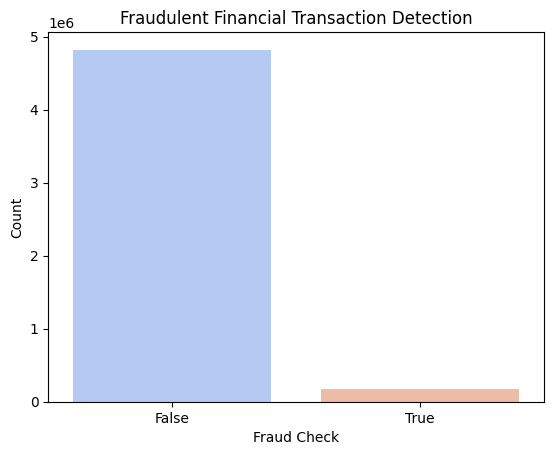

In [9]:
sns.countplot(data=df, x='is_fraud', palette='coolwarm')
plt.title("Fraudulent Financial Transaction Detection")
plt.xlabel("Fraud Check")
plt.ylabel("Count")
plt.show()

## Temporal Analysis

In [10]:
# Create temporal features for analysis
df['timestamp'] = pd.to_datetime(df['timestamp'], errors='coerce')
df['hour'] = df['timestamp'].dt.hour
df['day'] = df['timestamp'].dt.day
df['day_of_week'] = df['timestamp'].dt.weekday
df['month'] = df['timestamp'].dt.month

In [11]:
# Convert is_fraud to integer for analysis
df['is_fraud'] = df['is_fraud'].astype(int)

### Fraud by Month

In [12]:
fraud_by_month = df.groupby('month').agg(
    total_trans=("is_fraud", "count"),
    fraud_trans=("is_fraud", "sum")
)

fraud_by_month['fraud_rate (%)'] = fraud_by_month['fraud_trans'] * 100 / fraud_by_month['total_trans']
fraud_by_month["fraud_rate (%)"] = fraud_by_month["fraud_rate (%)"].round(2)
fraud_by_month.sort_values("fraud_rate (%)", ascending=False).head(10)

,total_trans,fraud_trans,fraud_rate (%)
month,,,
7.0,424492,15395,3.63
12.0,424558,15376,3.62
10.0,424906,15331,3.61
9.0,411277,14855,3.61
2.0,382551,13777,3.60
6.0,410890,14759,3.59
4.0,411054,14761,3.59
3.0,425454,15247,3.58
11.0,411100,14730,3.58


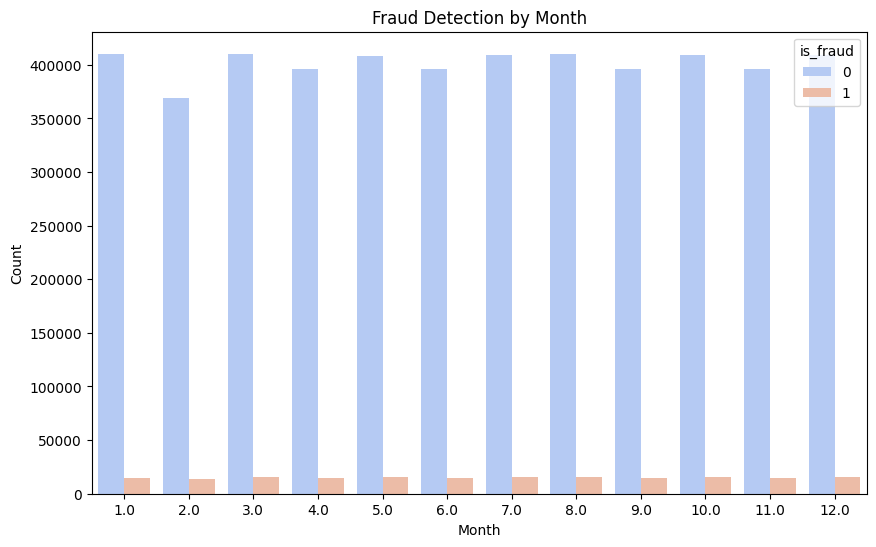

In [13]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='month', palette='coolwarm', hue='is_fraud')
plt.title("Fraud Detection by Month")
plt.xlabel("Month")
plt.ylabel("Count")
plt.show()

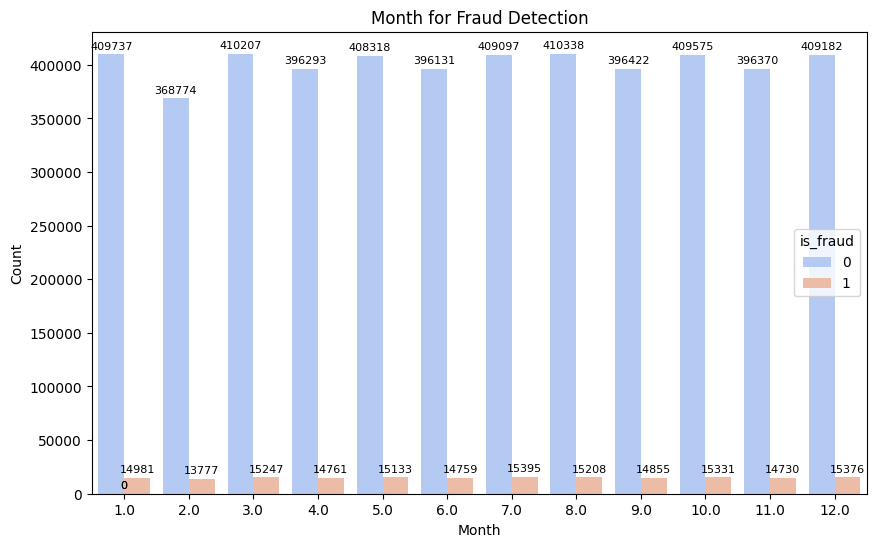

In [14]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df, x='month', hue='is_fraud', palette='coolwarm')
plt.title("Month for Fraud Detection")
plt.legend(title='is_fraud', loc='center right')
plt.xlabel("Month")
plt.ylabel("Count")
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=8, color='black',
                xytext=(0, 6), textcoords='offset points')
plt.show()

### Fraud by Day

In [15]:
fraud_by_day = df.groupby('day').agg(total_trans=('is_fraud', 'count'), fraud_trans=('is_fraud', 'sum'))
fraud_by_day['fraud_rate (%)'] = fraud_by_day['fraud_trans'] * 100 / fraud_by_day['total_trans']
fraud_by_day['fraud_rate (%)'] = fraud_by_day['fraud_rate (%)'].round(2)
fraud_by_day.sort_values(by='fraud_rate (%)', ascending=False).head(10)

,total_trans,fraud_trans,fraud_rate (%)
day,,,
9.0,164309,6021,3.66
29.0,150622,5520,3.66
23.0,164134,6010,3.66
8.0,164299,5982,3.64
21.0,165429,6023,3.64
26.0,164901,5983,3.63
28.0,164428,5975,3.63
11.0,163454,5917,3.62
7.0,164035,5930,3.62


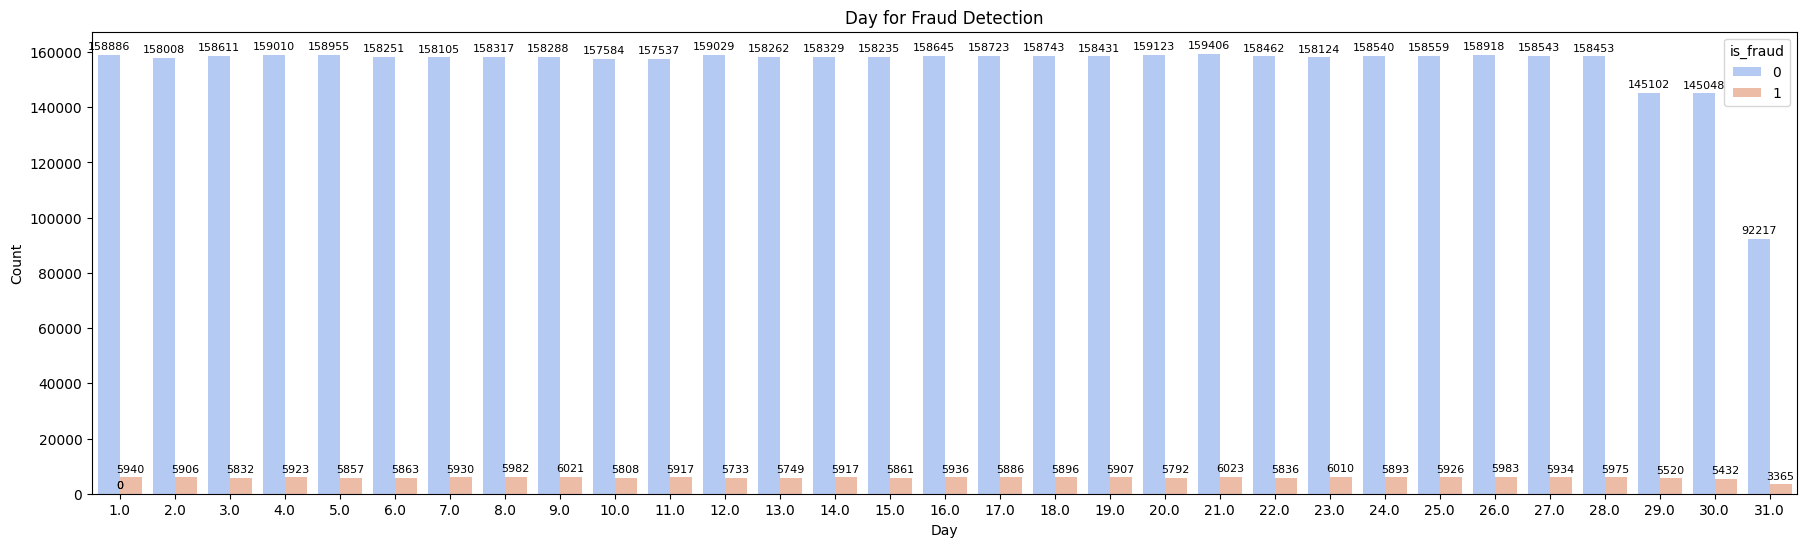

In [16]:
plt.figure(figsize=(22, 6))
ax = sns.countplot(data=df, x='day', hue='is_fraud', palette='coolwarm')
plt.title("Day for Fraud Detection")
plt.xlabel("Day")
plt.ylabel("Count")
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=8, color='black',
                xytext=(0, 6), textcoords='offset points')
plt.show()

## Account Analysis

In [17]:
print(f"Number of senders: {np.unique(df['sender_account']).size}")
print(f"Number of receivers: {np.unique(df['receiver_account']).size}")

Number of senders: 896513
Number of receivers: 896639


In [18]:
df.groupby('sender_account').size().reset_index(name='count').sort_values('count', ascending=False).head(10)

,sender_account,count
880495,ACC983922,20
828457,ACC931649,19
306713,ACC407908,19
759735,ACC862649,19
38337,ACC138486,19
752113,ACC854997,19
662672,ACC765230,18
295526,ACC396669,18
883189,ACC986628,18
721943,ACC824720,18


In [19]:
df.groupby("receiver_account").size().reset_index(name='count').sort_values('count', ascending=False).head(10)

,receiver_account,count
299127,ACC400278,23
702040,ACC804655,20
617176,ACC719493,19
889446,ACC992780,19
350954,ACC452312,19
858008,ACC961218,18
478530,ACC580358,18
205355,ACC306162,18
851278,ACC954459,18
851661,ACC954845,18


In [20]:
fraud_by_sender = df.groupby("sender_account").agg(total_trans=('is_fraud', 'count'), fraud_trans=('is_fraud', 'sum'))
fraud_by_sender['fraud_rate (%)'] = fraud_by_sender['fraud_trans'] * 100 / fraud_by_sender['total_trans']
fraud_by_sender['fraud_rate (%)'] = fraud_by_sender['fraud_rate (%)'].round(2)
fraud_by_sender.sort_values('fraud_rate (%)', ascending=False).head(10) 

,total_trans,fraud_trans,fraud_rate (%)
sender_account,,,
ACC921829,4,3,75.0
ACC403678,4,3,75.0
ACC690487,4,3,75.0
ACC785965,4,3,75.0
ACC111101,4,3,75.0
ACC952479,4,3,75.0
ACC578240,4,3,75.0
ACC340345,4,3,75.0
ACC741428,4,3,75.0


In [21]:
fraud_by_receiver = df.groupby("receiver_account").agg(total_trans=('is_fraud', 'count'), fraud_trans=('is_fraud', 'sum'))
fraud_by_receiver['fraud_rate (%)'] = fraud_by_receiver['fraud_trans'] * 100 / fraud_by_receiver['total_trans']
fraud_by_receiver['fraud_rate (%)'] = fraud_by_receiver['fraud_rate (%)'].round(2)
fraud_by_receiver.sort_values('fraud_rate (%)', ascending=False).head(10) 

,total_trans,fraud_trans,fraud_rate (%)
receiver_account,,,
ACC999582,1,1,100.0
ACC249700,1,1,100.0
ACC683694,3,3,100.0
ACC683783,2,2,100.0
ACC531033,1,1,100.0
ACC606560,1,1,100.0
ACC566945,1,1,100.0
ACC816696,1,1,100.0
ACC163183,1,1,100.0


In [22]:
df.groupby(['sender_account', 'receiver_account']).agg(
    total_trans=('is_fraud', 'count'),
    fraud_trans=('is_fraud', 'sum')
).sort_values('fraud_trans', ascending=False).head(10)

,,total_trans,fraud_trans
sender_account,receiver_account,,
ACC325773,ACC379073,1,1
ACC299645,ACC959771,1,1
ACC472863,ACC246101,1,1
ACC547606,ACC833384,1,1
ACC308653,ACC105558,1,1
ACC290257,ACC703716,1,1
ACC325773,ACC780125,1,1
ACC146819,ACC226855,1,1
ACC214204,ACC457857,1,1


## Transaction Amount Analysis

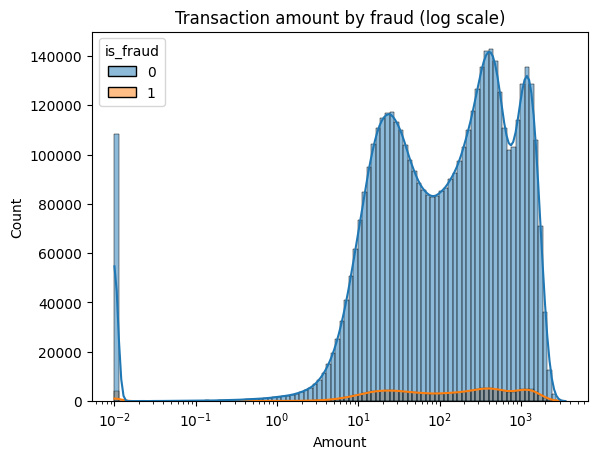

In [23]:
sns.histplot(data=df, x='amount', hue='is_fraud', bins=100, kde=True, log_scale=True)
plt.title("Transaction amount by fraud (log scale)")
plt.xlabel("Amount")
plt.show()

## Merchant Category Analysis

In [24]:
fraud_by_merchant = df.groupby('merchant_category').agg(
    total_trans=('is_fraud', 'count'),
    fraud_trans=('is_fraud', 'sum')
)
fraud_by_merchant['fraud_rate (%)'] = fraud_by_merchant['fraud_trans'] * 100 / fraud_by_merchant['total_trans']
fraud_by_merchant['fraud_rate (%)'] = fraud_by_merchant['fraud_rate (%)'].round(2)
fraud_by_merchant.sort_values('fraud_rate (%)', ascending=False).head(10)

,total_trans,fraud_trans,fraud_rate (%)
merchant_category,,,
entertainment,625332,22573,3.61
other,624589,22556,3.61
grocery,624954,22516,3.60
travel,625656,22503,3.60
online,623581,22324,3.58
restaurant,625483,22367,3.58
retail,626319,22453,3.58
utilities,624086,22261,3.57


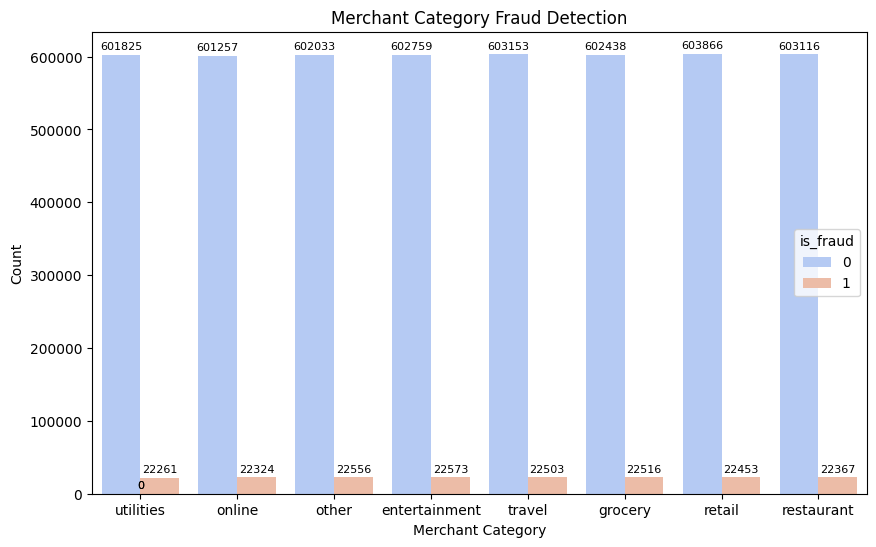

In [25]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df, x='merchant_category', hue='is_fraud', palette='coolwarm')
plt.title("Merchant Category Fraud Detection")
plt.xlabel("Merchant Category")
plt.ylabel("Count")
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=8, color='black',
                xytext=(0, 6), textcoords='offset points')
plt.show()

## Transaction Type Analysis

In [26]:
df.groupby('transaction_type').size().reset_index(name='count').sort_values('count', ascending=False).head(10)

,transaction_type,count
0,deposit,1250593
1,payment,1250438
2,transfer,1250334
3,withdrawal,1248635


In [27]:
fraud_by_transaction_type = df.groupby('transaction_type').agg(
    total_trans=('is_fraud', 'count'),
    fraud_trans=('is_fraud', 'sum')
)
fraud_by_transaction_type['fraud_rate (%)'] = fraud_by_transaction_type['fraud_trans'] * 100 / fraud_by_transaction_type['total_trans']
fraud_by_transaction_type['fraud_rate (%)'] = fraud_by_transaction_type['fraud_rate (%)'].round(2)
fraud_by_transaction_type.sort_values('fraud_rate (%)', ascending=False).head(10)

,total_trans,fraud_trans,fraud_rate (%)
transaction_type,,,
transfer,1250334,45328,3.63
withdrawal,1248635,44874,3.59
deposit,1250593,44786,3.58
payment,1250438,44565,3.56


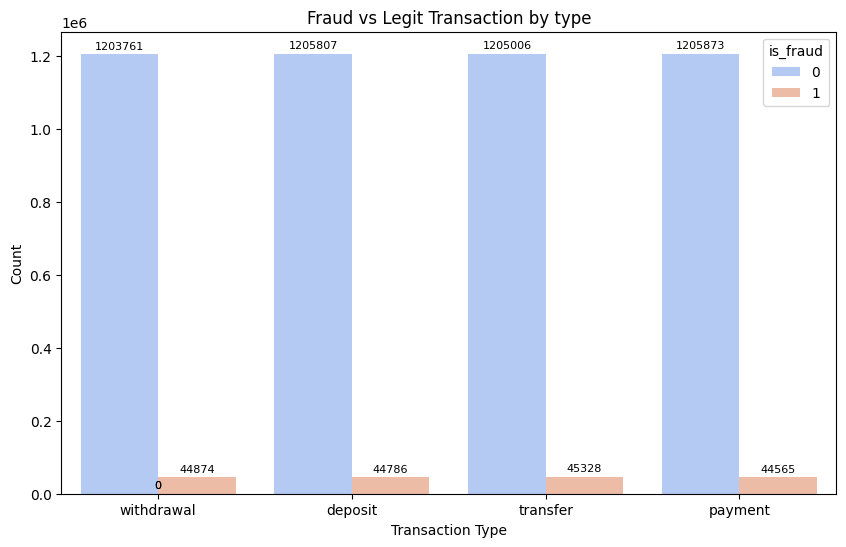

In [28]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df, x='transaction_type', hue='is_fraud', palette='coolwarm')
plt.title("Fraud vs Legit Transaction by type")
plt.xlabel("Transaction Type")
plt.ylabel("Count")
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=8, color='black',
                xytext=(0, 6), textcoords='offset points')
plt.show()

## Risk Score Analysis

### Spending Deviation Score

In [29]:
fraud_by_sds = (df.groupby("spending_deviation_score").agg(
    total_trans=('is_fraud','count'),
    fraud_trans=('is_fraud','sum')
).sort_values('fraud_trans',ascending=False))
fraud_by_sds['fraud_rate (%)'] = fraud_by_sds['fraud_trans']*100/fraud_by_sds['total_trans']
fraud_by_sds['fraud_rate (%)'] = fraud_by_sds['fraud_rate (%)'].round(2)
fraud_by_sds.head(10)

,total_trans,fraud_trans,fraud_rate (%)
spending_deviation_score,,,
0.15,19779,762,3.85
0.07,19742,759,3.84
0.02,19802,757,3.82
-0.00,20087,756,3.76
-0.11,19903,750,3.77
0.17,19665,747,3.80
-0.23,19558,743,3.80
-0.07,20078,741,3.69
0.13,19571,740,3.78


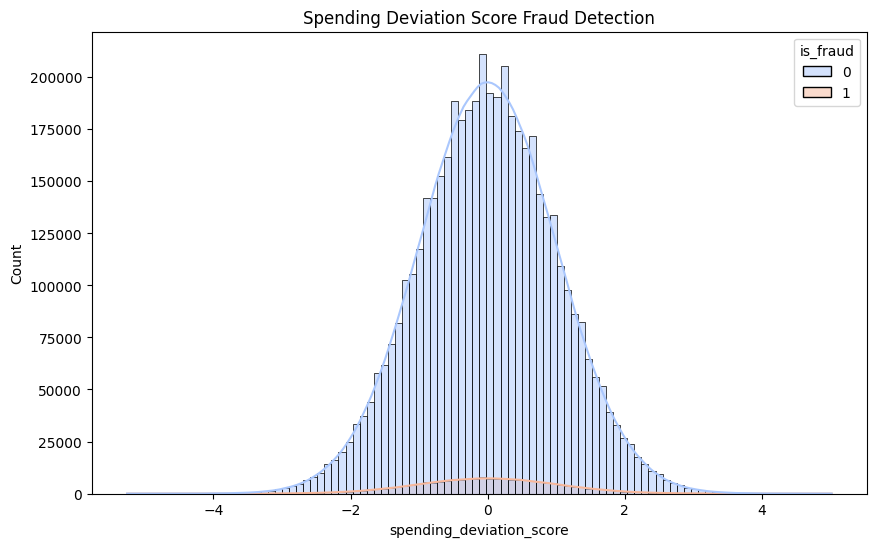

In [30]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='spending_deviation_score', hue='is_fraud', palette='coolwarm', bins=100, kde=True)
plt.title("Spending Deviation Score Fraud Detection")
plt.show()

### Velocity Score

In [31]:
fraud_by_vs = (df.groupby("velocity_score").agg(
    total_trans=('is_fraud','count'),
    fraud_trans=('is_fraud','sum')
))
fraud_by_vs['fraud_rate (%)'] = fraud_by_vs['fraud_trans']*100/fraud_by_vs['total_trans']
fraud_by_vs['fraud_rate (%)'] = fraud_by_vs['fraud_rate (%)'].round(2)
fraud_by_vs.sort_values('fraud_rate (%)',ascending=False).head(10)

,total_trans,fraud_trans,fraud_rate (%)
velocity_score,,,
17,250353,9102,3.64
6,249818,9078,3.63
5,249956,9083,3.63
8,249065,9053,3.63
18,250777,9096,3.63
20,250050,9030,3.61
19,249834,9030,3.61
12,249695,9018,3.61
11,249904,8992,3.60


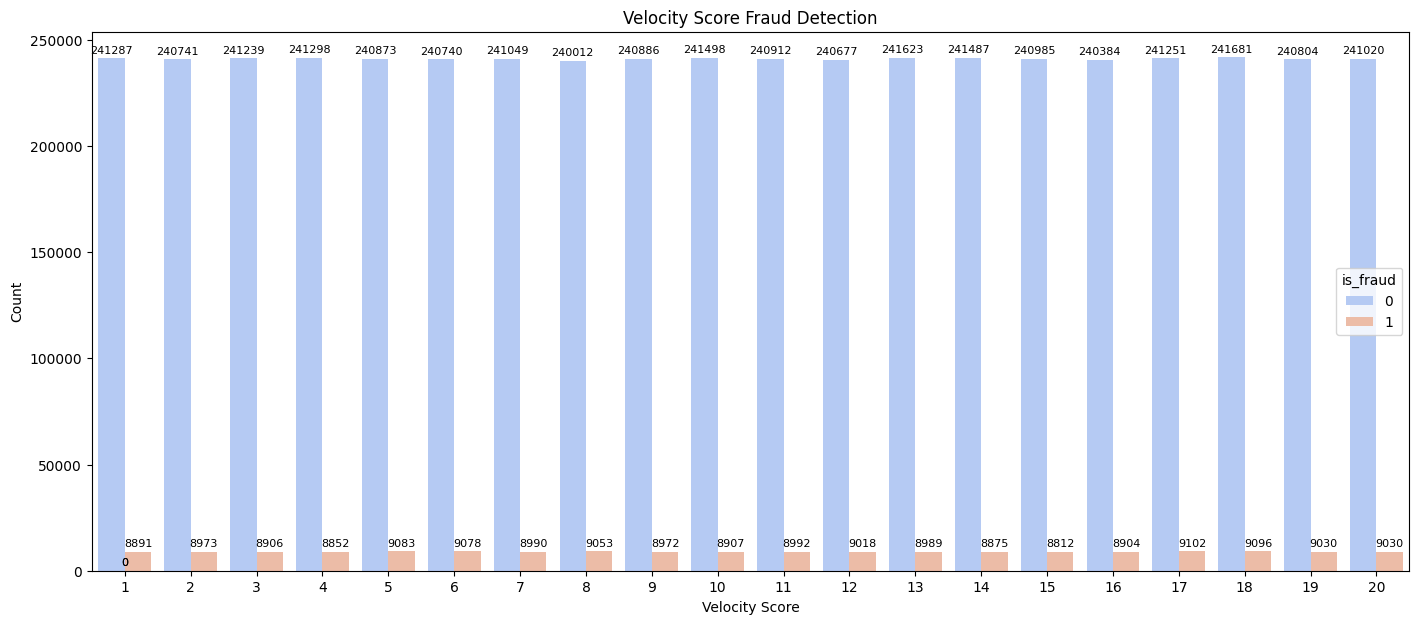

In [32]:
plt.figure(figsize=(17,7))
ax = sns.countplot(data=df,x='velocity_score',hue='is_fraud',palette='coolwarm')
ax.legend(title="is_fraud",loc='center right')
plt.title("Velocity Score Fraud Detection")
plt.xlabel("Velocity Score")
plt.ylabel("Count")
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                fontsize=8, color='black',
                xytext=(0, 6),textcoords='offset points')
plt.show()

### Geo Anomaly Score

In [33]:
fraud_by_gas = (df.groupby("geo_anomaly_score").agg(
    total_trans=('is_fraud','count'),
    fraud_trans=('is_fraud','sum')
))
fraud_by_gas['fraud_rate (%)'] = fraud_by_gas['fraud_trans']*100/fraud_by_gas['total_trans']
fraud_by_gas['fraud_rate (%)'] = fraud_by_gas['fraud_rate (%)'].round(2)
fraud_by_gas.sort_values('fraud_rate (%)').head(10)

,total_trans,fraud_trans,fraud_rate (%)
geo_anomaly_score,,,
0.04,50116,1680,3.35
0.68,49850,1692,3.39
0.83,49585,1694,3.42
0.15,49600,1697,3.42
0.67,50384,1734,3.44
0.18,49876,1721,3.45
0.43,50018,1738,3.47
0.47,49951,1731,3.47
0.94,50208,1746,3.48


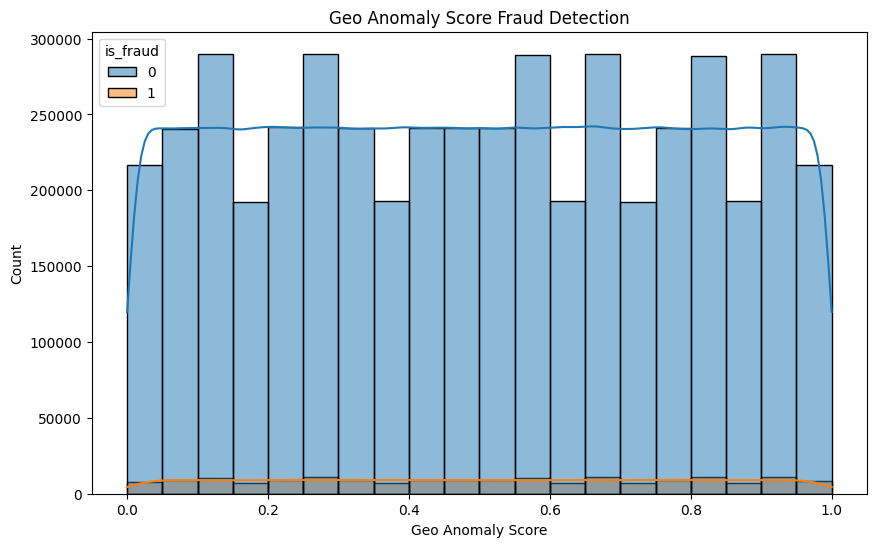

In [34]:
plt.figure(figsize=(10,6))
sns.histplot(data=df,x='geo_anomaly_score',bins=20,hue='is_fraud',kde=True)
plt.title("Geo Anomaly Score Fraud Detection")
plt.xlabel("Geo Anomaly Score")
plt.ylabel("Count")
plt.show()

## Location Analysis

In [35]:
fraud_by_ip = (df.groupby("ip_address").agg(
    total_trans=('is_fraud','count'),
    fraud_trans=('is_fraud','sum')
))
fraud_by_ip['fraud_rate (%)'] = fraud_by_ip['fraud_trans']*100/fraud_by_ip['total_trans']
fraud_by_ip['fraud_rate (%)'] = fraud_by_ip['fraud_rate (%)'].round(2)
fraud_by_ip.sort_values('fraud_rate (%)',ascending=False).head(10)

,total_trans,fraud_trans,fraud_rate (%)
ip_address,,,
156.164.14.6,1,1,100.0
113.207.232.27,1,1,100.0
147.142.62.206,1,1,100.0
161.76.209.251,1,1,100.0
179.67.238.77,1,1,100.0
158.23.105.51,1,1,100.0
196.92.110.75,1,1,100.0
117.202.117.240,1,1,100.0
180.153.250.197,1,1,100.0


In [36]:
fraud_by_loc = (df.groupby("location").agg(
    total_trans=('is_fraud','count'),
    fraud_trans=('is_fraud','sum')
))
fraud_by_loc['fraud_rate (%)'] = fraud_by_loc['fraud_trans']*100/fraud_by_loc['total_trans']
fraud_by_loc['fraud_rate (%)'] = fraud_by_loc['fraud_rate (%)'].round(2)
fraud_by_loc.sort_values('fraud_rate (%)',ascending=False).head(10)

,total_trans,fraud_trans,fraud_rate (%)
location,,,
London,624256,22478,3.60
Toronto,624349,22501,3.60
New York,625354,22460,3.59
Berlin,625289,22435,3.59
Sydney,625125,22458,3.59
Singapore,625313,22461,3.59
Dubai,624320,22340,3.58
Tokyo,625994,22420,3.58


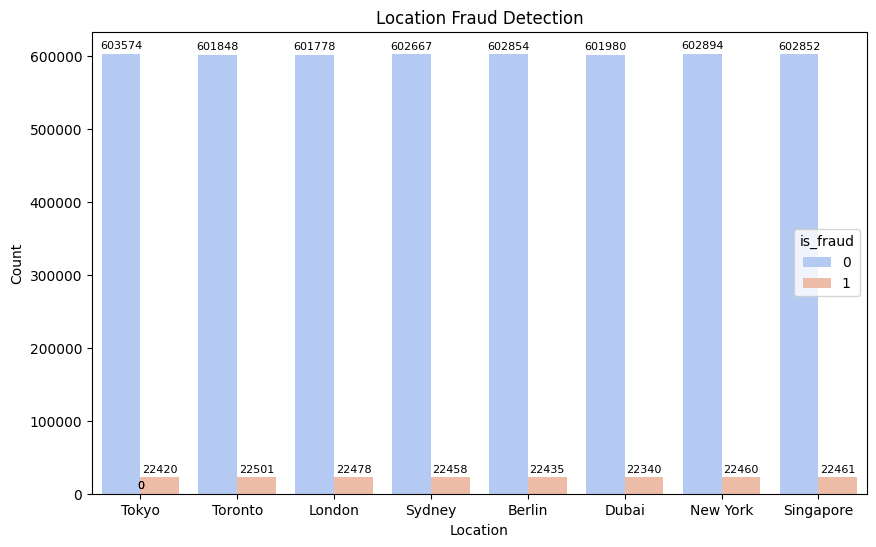

In [37]:
plt.figure(figsize=(10,6))
ax = sns.countplot(x='location',hue='is_fraud',data=df,palette='coolwarm')
plt.title('Location Fraud Detection')
plt.xlabel('Location')
plt.ylabel('Count')
plt.legend(title='is_fraud',loc='center right')
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                fontsize=8, color='black',
                xytext=(0, 6),textcoords='offset points')
plt.show()

## Payment Channel Analysis

In [38]:
fraud_by_pc = (df.groupby("payment_channel").agg(
    total_trans=('is_fraud','count'),
    fraud_trans=('is_fraud','sum')
))
fraud_by_pc['fraud_rate (%)'] = fraud_by_pc['fraud_trans']*100/fraud_by_pc['total_trans']
fraud_by_pc['fraud_rate (%)'] = fraud_by_pc['fraud_rate (%)'].round(2)
fraud_by_pc.sort_values('fraud_rate (%)',ascending=False).head(10)

,total_trans,fraud_trans,fraud_rate (%)
payment_channel,,,
wire_transfer,1251219,45034,3.60
UPI,1248847,44896,3.59
card,1249693,44885,3.59
ACH,1250241,44738,3.58


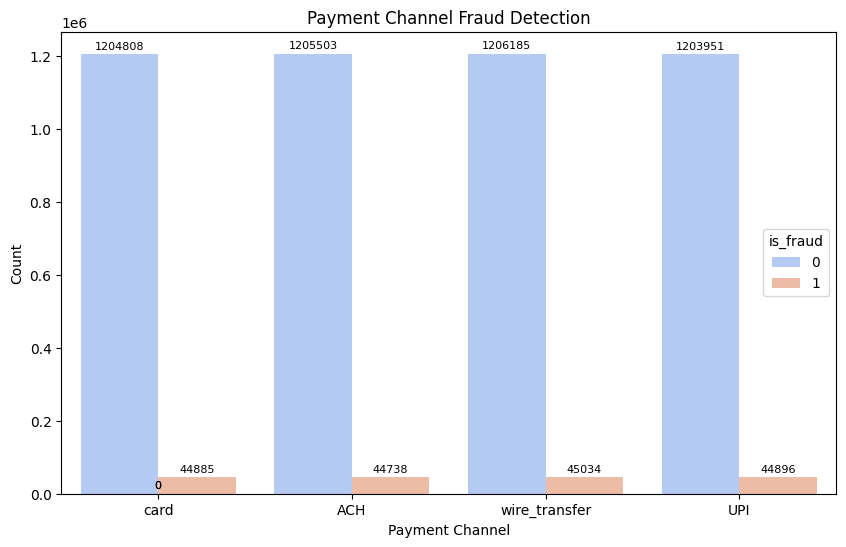

In [39]:
plt.figure(figsize=(10,6))
ax = sns.countplot(x='payment_channel',hue='is_fraud',data=df,palette='coolwarm')
plt.title('Payment Channel Fraud Detection')
plt.xlabel('Payment Channel')
plt.ylabel('Count')
plt.legend(title='is_fraud',loc='center right')
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                fontsize=8, color='black',
                xytext=(0, 6),textcoords='offset points')
plt.show()

## Device Analysis

In [40]:
fraud_by_dh = (df.groupby("device_hash").agg(
    total_trans=('is_fraud','count'),
    fraud_trans=('is_fraud','sum')
))
fraud_by_dh['fraud_rate (%)'] = fraud_by_dh['fraud_trans']*100/fraud_by_dh['total_trans']
fraud_by_dh['fraud_rate (%)'] = fraud_by_dh['fraud_rate (%)'].round(2)
fraud_by_dh.sort_values('fraud_rate (%)',ascending=False).head(10)

,total_trans,fraud_trans,fraud_rate (%)
device_hash,,,
D1000052,1,1,100.0
D9999807,1,1,100.0
D9999822,1,1,100.0
D9999734,1,1,100.0
D9999681,1,1,100.0
D9999548,1,1,100.0
D9999440,1,1,100.0
D9999416,1,1,100.0
D9999312,1,1,100.0


## Correlation Analysis

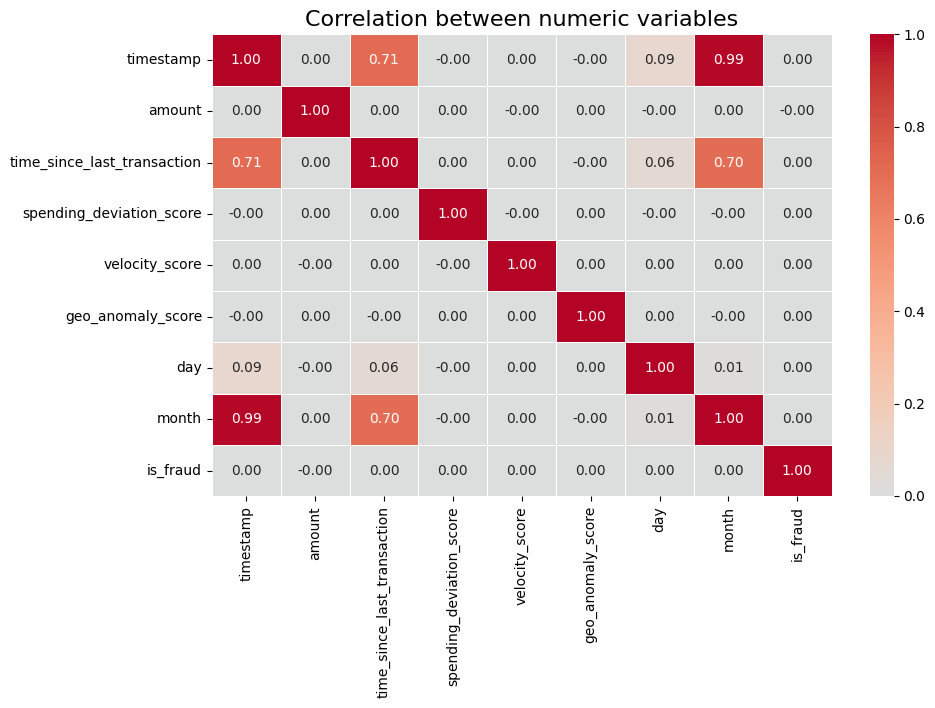

In [41]:
corr_df = df[["timestamp", "amount", "time_since_last_transaction", "spending_deviation_score","velocity_score","geo_anomaly_score","day","month","is_fraud"]]
correlation_matrix = corr_df.corr()
plt.figure(figsize=(10,6))
sns.heatmap(data=correlation_matrix,annot=True,cmap='coolwarm',center=0,linewidths=0.5,cbar=True,fmt='.2f')
plt.title("Correlation between numeric variables",fontsize=16)
plt.show()